In [2]:
import pandas as pd


In [4]:
#import data
train= pd.read_csv('../data/titanic/train.csv')
#fill Age data columns with average data
train = train.fillna({"Age": train['Age'].mean()})

#cut specifically define the bin edges. There is no guarantee about the distribution of items in each bin
train['CategoricalAge'] = pd.cut(train['Age'], 5)
train.CategoricalAge.unique()

    

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [5]:
#Categorized Age in to 5 groups
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4 ;


In [7]:
#fill Fare data columns with average data
train = train.fillna({"Fare": train['Fare'].mean()})
train['CategoricalFare'] = pd.qcut(train['Fare'], 5) 
#qcut calculate the size of each bin in order to make sure the distribution of data in the bins is equal
train.CategoricalFare.unique()

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [8]:
#Categorized Fare in to 5 groups
train.loc[ train['Fare'] <= 7.854, 'Fare']  = 0
train.loc[(train['Fare'] > 7.854) & (train['Fare'] <= 10.5), 'Fare'] = 1
train.loc[(train['Fare'] > 10.5) & (train['Fare'] <= 21.679), 'Fare']   = 2
train.loc[(train['Fare'] > 21.679) & (train['Fare'] <= 39.688), 'Fare']   = 3
train.loc[(train['Fare'] > 39.688), 'Fare']   = 4
train['Age'] = train['Age'].astype(int)
train['Fare'] = train['Fare'].astype(int)

In [11]:
#fill null data in Embarked with highest port of embarktion 'S'
train = train.fillna({"Embarked": "S"})
#Mapping string data into number in order to categorize data 
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [13]:
#get the length of the name
train['Name_Count'] = train['Name'].apply(lambda x: len(x.split()))
#check if passenger has cabin 
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
#create new feature FamilySize as a combination of SibSp and Parch
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
#create new feature Solotraveler from FamilySize
train['Solotravel'] = 0
train.loc[train['FamilySize'] == 1, 'Solotravel'] = 1

In [15]:
#Drop some columns that do not use for model prediction
train =train.drop(['PassengerId','Name','Ticket','Cabin','CategoricalAge','CategoricalFare'],axis=1)

In [16]:
X = train.loc[:, train.columns != 'Survived'].values
y = train.loc[:, 'Survived'].values

In [21]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Name_Count', 'Has_Cabin', 'FamilySize', 'Solotravel'],
      dtype='object')

### Feature Importance - Decision Tree Model

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 20)

from sklearn.tree import DecisionTreeClassifier #Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

Feature: 0, Score: 0.13914
Feature: 1, Score: 0.34733
Feature: 2, Score: 0.09213
Feature: 3, Score: 0.03627
Feature: 4, Score: 0.01205
Feature: 5, Score: 0.08097
Feature: 6, Score: 0.06703
Feature: 7, Score: 0.10505
Feature: 8, Score: 0.05611
Feature: 9, Score: 0.05528
Feature: 10, Score: 0.00862


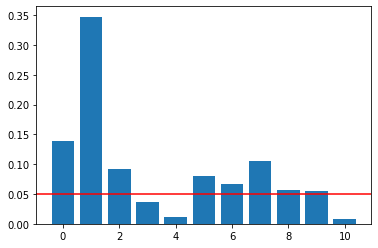

Feature: 0, Score: 0.13914
Feature: 1, Score: 0.34733
Feature: 2, Score: 0.09213
Feature: 5, Score: 0.08097
Feature: 6, Score: 0.06703
Feature: 7, Score: 0.10505
Feature: 8, Score: 0.05611
Feature: 9, Score: 0.05528


In [25]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.show()

#use only high important features to feed into a model
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))

### Feature Importance - Linear Regression Model

Feature: 0, Score: -0.61634
Feature: 1, Score: -2.33443
Feature: 2, Score: -0.62064
Feature: 3, Score: -0.20689
Feature: 4, Score: -0.04796
Feature: 5, Score: 0.28623
Feature: 6, Score: 0.25230
Feature: 7, Score: 0.11414
Feature: 8, Score: 0.57766
Feature: 9, Score: -0.25423
Feature: 10, Score: -0.46428


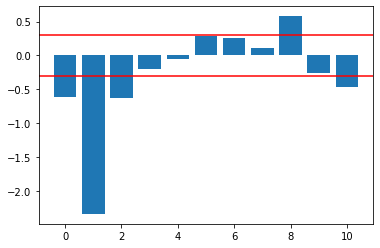

Feature: 0, Score: -0.61634
Feature: 1, Score: -2.33443
Feature: 2, Score: -0.62064
Feature: 8, Score: 0.57766
Feature: 10, Score: -0.46428


In [29]:
from sklearn.linear_model import LogisticRegression
model_l = LogisticRegression()
model_l.fit(X_train, y_train)

# get importance
importance_l = model_l.coef_[0]

# summarize feature importance
for i,v in enumerate(importance_l):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance_l))], importance_l)
plt.axhline(y=0.3, color='r', linestyle='-')
plt.axhline(y=-0.3, color='r', linestyle='-')
plt.show()

#use only high important features to feed into a model
for i,v in enumerate(importance_l):
    if v >= 0.3 or v <= -0.3:
        print('Feature: %0d, Score: %.5f' % (i,v))

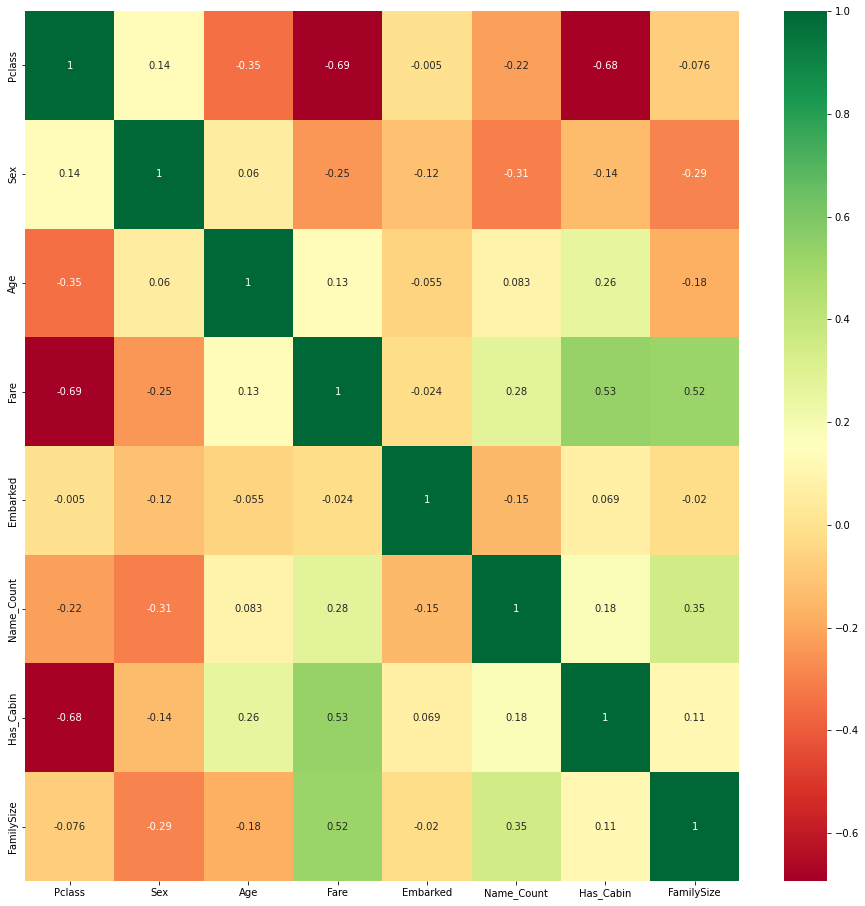

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

train_imp = train[['Pclass', 'Sex', 'Age', 'Fare','Embarked', 'Name_Count', 'Has_Cabin', 'FamilySize']] #8 important features
plt.figure(figsize=(16,16))
g = sns.heatmap(train_imp.corr(method='spearman'),annot=True,cmap="RdYlGn")

In [31]:
corre = train_imp.corr(method='spearman')
#low correlation features
corre_pairs = corre.unstack()
sorted_pairss = corre_pairs.sort_values(kind="quicksort")
pairss = sorted_pairss[sorted_pairss < 0.8]
print(pairss)
#filter out if there are high correlation
strong_pairss = sorted_pairss[sorted_pairss > 0.8]
print(strong_pairss)

Pclass      Fare         -0.692857
Fare        Pclass       -0.692857
Pclass      Has_Cabin    -0.683291
Has_Cabin   Pclass       -0.683291
Pclass      Age          -0.348396
Age         Pclass       -0.348396
Name_Count  Sex          -0.307312
Sex         Name_Count   -0.307312
            FamilySize   -0.292035
FamilySize  Sex          -0.292035
Fare        Sex          -0.246571
Sex         Fare         -0.246571
Pclass      Name_Count   -0.220829
Name_Count  Pclass       -0.220829
FamilySize  Age          -0.179675
Age         FamilySize   -0.179675
Embarked    Name_Count   -0.148167
Name_Count  Embarked     -0.148167
Sex         Has_Cabin    -0.140391
Has_Cabin   Sex          -0.140391
Sex         Embarked     -0.120400
Embarked    Sex          -0.120400
Pclass      FamilySize   -0.075698
FamilySize  Pclass       -0.075698
Embarked    Age          -0.055191
Age         Embarked     -0.055191
Fare        Embarked     -0.024278
Embarked    Fare         -0.024278
            FamilySi

In [33]:
from xgboost import XGBClassifier
import xgboost as xgb

#Use only 8 important features
drop_elements = ['SibSp','Parch','Solotravel']
train_final = train.drop(drop_elements, axis = 1)
XX = train_final.loc[:, train_final.columns != 'Survived'].values
yy = train_final.loc[:, 'Survived'].values
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state= 123)
xgb_model = xgb.XGBClassifier(
 #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
xgb_model.fit(XX_train, yy_train)
xgb_model.score(XX_test,yy_test)
results = xgb_model.predict(XX_test)

/home/ubuntu/ml/kkbox-churn-kaggle/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
